In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import pandas as pd
df = pd.read_csv('iot23_combined_new.csv')

/tmp/ipykernel_37201/3066079408.py:2: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iot23_combined_new.csv')


In [3]:
df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,0.000003,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [4]:
df['label'].unique()

array(['PartOfAHorizontalPortScan', 'Okiru', 'DDoS', 'C&C-HeartBeat',
       'Benign', 'C&C-Torii', 'C&C', 'C&C-FileDownload', 'Okiru-Attack',
       'Attack', 'FileDownload', 'C&C-HeartBeat-FileDownload',
       'C&C-Mirai'], dtype=object)

In [5]:
df.columns

Index(['Unnamed: 0', 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h',
       'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.iloc[5]

ts                1536227023.384702
uid              CTQSiF4gOLgSBkBIOa
id.orig_h           192.168.100.111
id.orig_p                   17832.0
id.resp_h            156.95.242.221
id.resp_p                   37215.0
proto                           tcp
service                           -
duration                   0.000002
orig_bytes                        0
resp_bytes                        0
conn_state                       S0
local_orig                        -
local_resp                        -
missed_bytes                    0.0
history                           S
orig_pkts                       2.0
orig_ip_bytes                  80.0
resp_pkts                       0.0
resp_ip_bytes                   0.0
label                         Okiru
Name: 5, dtype: object

In [8]:
df['label'].value_counts()

PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [9]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')

In [10]:
df['local_orig'].value_counts()

-    6046623
Name: local_orig, dtype: int64

In [11]:
df['local_resp'].value_counts()

-    6046623
Name: local_resp, dtype: int64

Change column names to more explainable ones

In [12]:
df.columns = [
    'timestamp',
    'unique_identifier',
    'origin_ip_address',
    'origin_port',
    'destination_ip_address',
    'destination_port',
    'network_protocol',
    'network_service',
    'connection_duration',
    'bytes_sent_by_origin',
    'bytes_sent_by_destination',
    'connection_state',
    'is_source_local',
    'is_destination_local',
    'missed_bytes_count',
    'connection_history',
    'packets_sent_by_source',
    'ip_bytes_sent_by_source',
    'packets_sent_by_destination',
    'ip_bytes_sent_by_destination',
    'label'
]


In [13]:
df['origin_ip_address'].value_counts()

192.168.1.197      1004274
192.168.1.198       999940
192.168.100.111     999711
192.168.1.195       522846
192.168.1.194       499990
                    ...   
120.80.201.14            1
84.63.59.168             1
179.86.71.177            1
123.60.157.103           1
62.55.151.88             1
Name: origin_ip_address, Length: 1494, dtype: int64

In [14]:
df['connection_state'].value_counts()

S0        5514038
OTH        515339
SF          11653
REJ          2488
S3           2484
RSTR          334
SH            105
RSTO          100
RSTOS0         44
S1             16
SHR            14
S2              6
RSTRH           2
Name: connection_state, dtype: int64

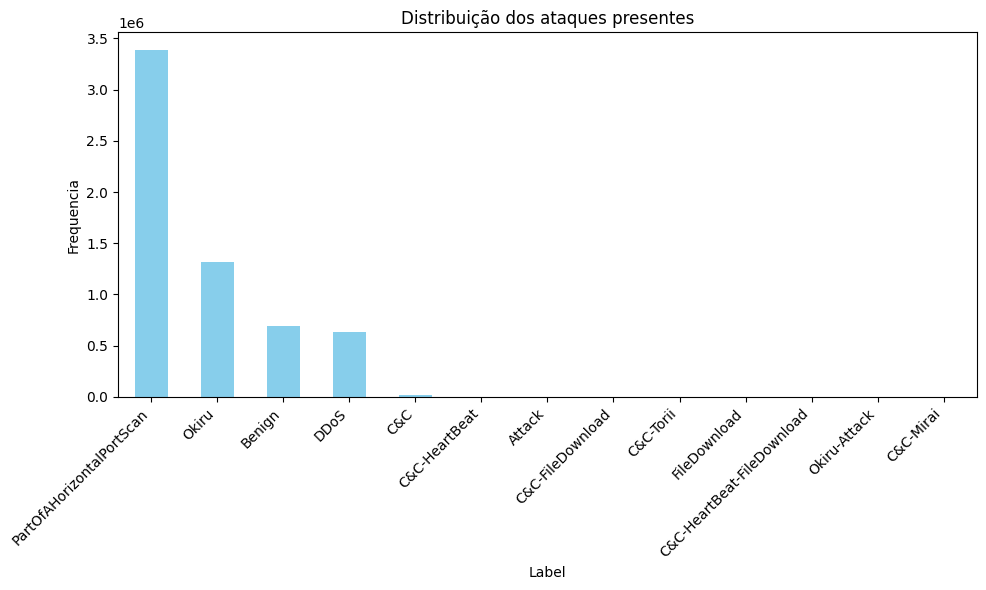

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


event_label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
event_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos ataques presentes')
plt.xlabel('Label')
plt.ylabel('Frequencia')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

plt.show()


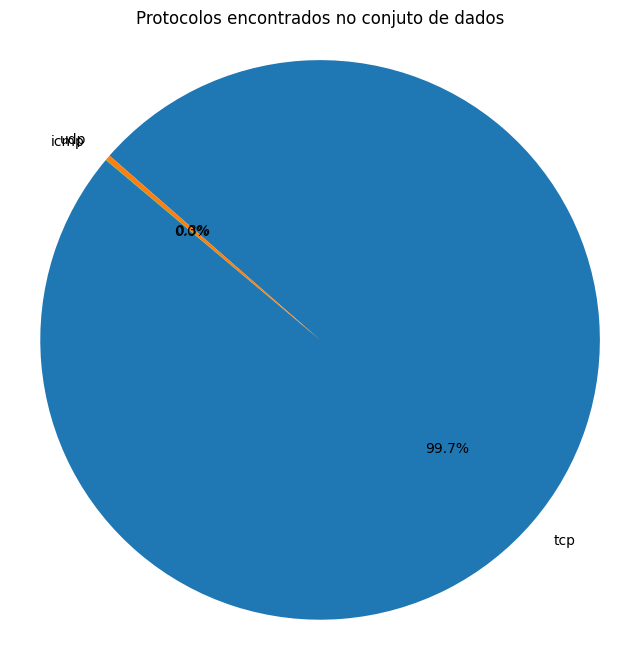

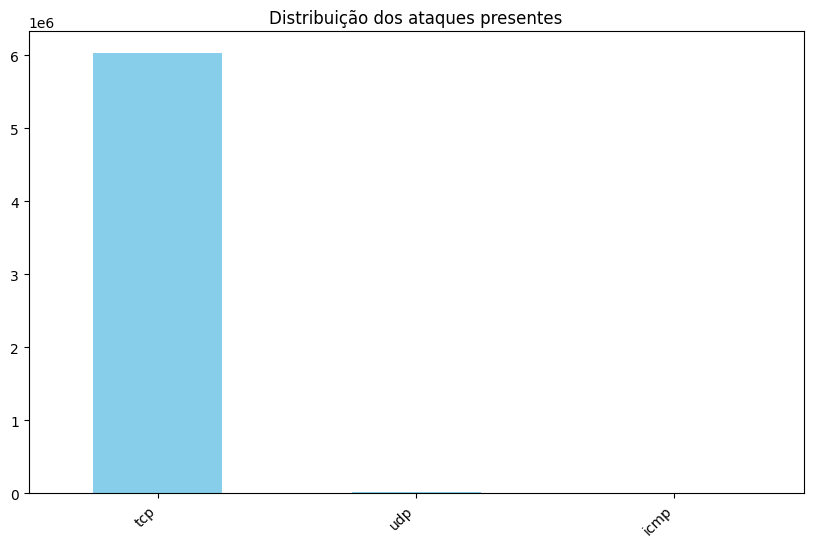

In [21]:

protocol_usage_counts = df['network_protocol'].value_counts()

plt.figure(figsize=(8, 8)) 
plt.pie(protocol_usage_counts, labels=protocol_usage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Protocolos encontrados no conjuto de dados')
plt.axis('equal')  

plt.show()



Summary Statistics of Connection Duration by Label:


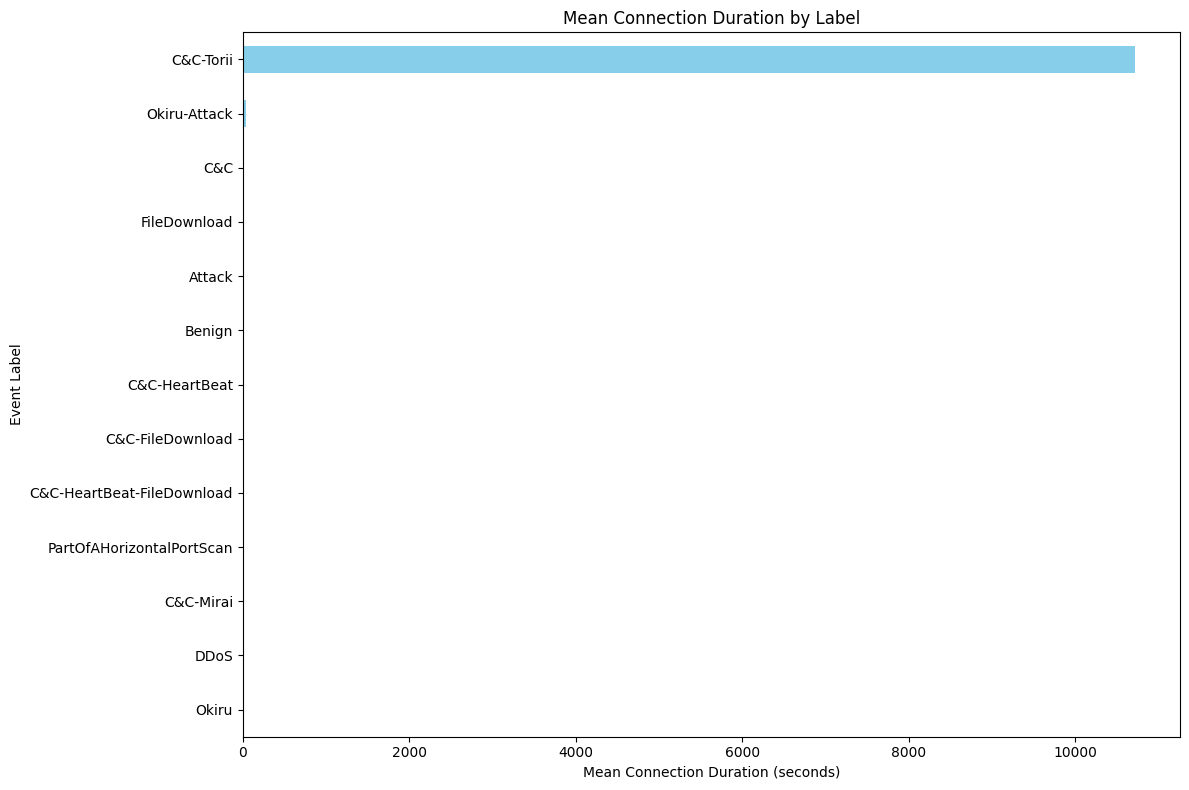

In [22]:
import pandas as pd

# Assuming your DataFrame is named df and it has columns named 'connection_duration' and 'event_label'
# Ensure 'connection_duration' is numeric
df['connection_duration'] = pd.to_numeric(df['connection_duration'], errors='coerce')

# Group by 'event_label' and calculate summary statistics for 'connection_duration'
connection_duration_by_label = df.groupby('label')['connection_duration'].describe()

# You might be specifically interested in certain statistics, like mean and median:
mean_connection_duration_by_label = df.groupby('label')['connection_duration'].mean()
median_connection_duration_by_label = df.groupby('label')['connection_duration'].median()

# Print the summary statistics
print("Summary Statistics of Connection Duration by Label:")
connection_duration_by_label.to_csv("sumary.csv")

# If you want to visualize this, a bar chart for the mean or median connection duration can be insightful:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
mean_connection_duration_by_label.sort_values().plot(kind='barh', color='skyblue')
plt.title('Mean Connection Duration by Label')
plt.xlabel('Mean Connection Duration (seconds)')
plt.ylabel('Event Label')
plt.tight_layout()
plt.show()

# Similar plot can be made for median values or any other statistic of interest.


In [19]:
import pandas as pd

# Assuming your DataFrame is named df
# Count occurrences of each (source_ip_address, destination_ip_address) pair
pair_counts = df.groupby(['origin_ip_address', 'destination_ip_address']).size().reset_index(name='connections')

# Sort pairs by the number of connections, descending
top_pairs = pair_counts.sort_values(by='connections', ascending=False).head(10)

print(top_pairs)


        origin_ip_address destination_ip_address  connections
996489      192.168.1.195         162.248.88.215       499142
996484      192.168.1.195         123.59.209.185        14260
996495      192.168.1.195         185.244.25.235         6768
4987352   192.168.100.113        178.128.185.250         4112
4987347   192.168.100.113         128.185.250.50         4110
1632943     192.168.1.197         185.244.25.183         1947
4987355   192.168.100.113          192.168.100.1         1872
1658612     192.168.1.197            192.168.1.1         1681
4987350   192.168.100.113          147.231.100.5         1334
3491124   192.168.100.103          217.30.75.147         1301


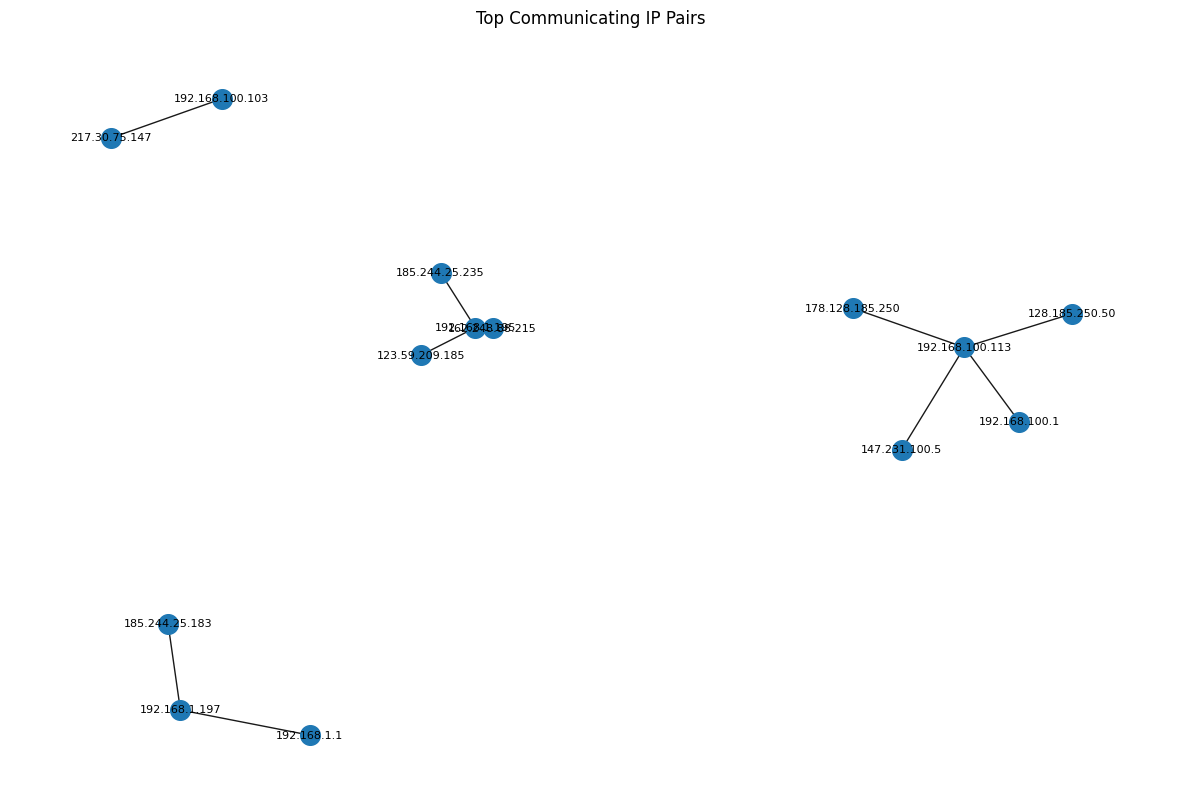

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges from top_pairs
# Assuming 'top_pairs' contains the top communicating IP pairs
for index, row in top_pairs.iterrows():
    G.add_edge(row['origin_ip_address'], row['destination_ip_address'], weight=row['connections'])

# Draw the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=5, seed=42)  # For consistent layout
edges = nx.draw_networkx_edges(G, pos, alpha=0.9)
nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
labels = nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Top Communicating IP Pairs')
plt.axis('off')  # Turn off the axis
plt.show()


In [21]:
# Assuming G is your graph
for (source, destination, data) in G.edges(data=True):
    print(f"Source: {source}, Destination: {destination}, Connections: {data.get('weight', 'N/A')}")


Source: 192.168.1.195, Destination: 162.248.88.215, Connections: 499142
Source: 192.168.1.195, Destination: 123.59.209.185, Connections: 14260
Source: 192.168.1.195, Destination: 185.244.25.235, Connections: 6768
Source: 192.168.100.113, Destination: 178.128.185.250, Connections: 4112
Source: 192.168.100.113, Destination: 128.185.250.50, Connections: 4110
Source: 192.168.100.113, Destination: 192.168.100.1, Connections: 1872
Source: 192.168.100.113, Destination: 147.231.100.5, Connections: 1334
Source: 192.168.1.197, Destination: 185.244.25.183, Connections: 1947
Source: 192.168.1.197, Destination: 192.168.1.1, Connections: 1681
Source: 192.168.100.103, Destination: 217.30.75.147, Connections: 1301


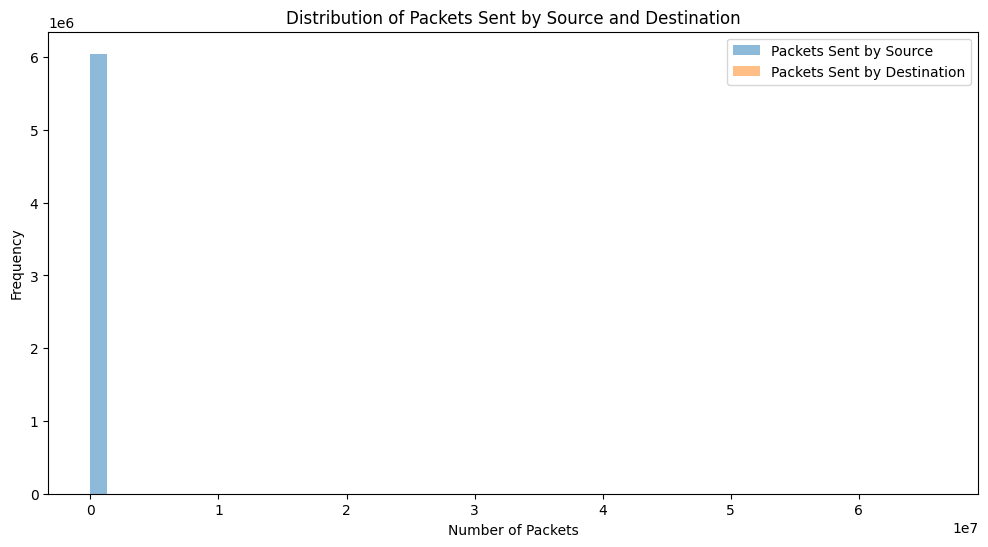

In [22]:
df['packets_sent_by_source'] = pd.to_numeric(df['packets_sent_by_source'], errors='coerce')
df['packets_sent_by_destination'] = pd.to_numeric(df['packets_sent_by_destination'], errors='coerce')

plt.figure(figsize=(12, 6))

# Plot histograms for packets sent by source and destination
plt.hist(df['packets_sent_by_source'], bins=50, alpha=0.5, label='Packets Sent by Source')
plt.hist(df['packets_sent_by_destination'], bins=50, alpha=0.5, label='Packets Sent by Destination')

plt.xlabel('Number of Packets')
plt.ylabel('Frequency')
plt.title('Distribution of Packets Sent by Source and Destination')
plt.legend()

plt.show()


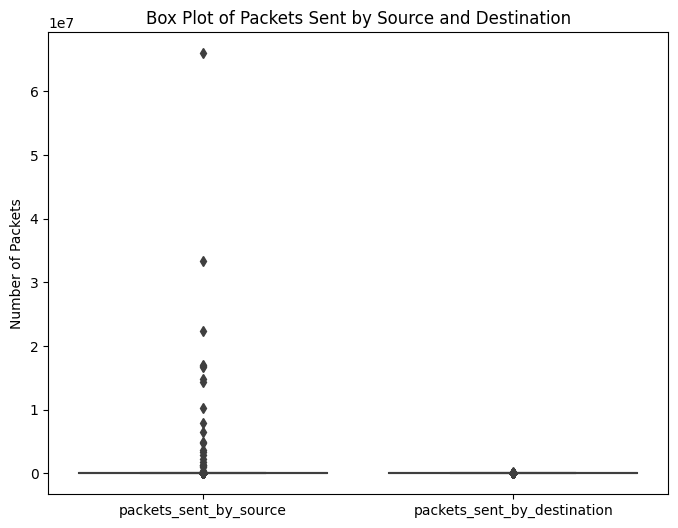

In [23]:
plt.figure(figsize=(8, 6))

# Melting the DataFrame for easier plotting with seaborn
packets_melted = df.melt(value_vars=['packets_sent_by_source', 'packets_sent_by_destination'], var_name='Type', value_name='Packets')

# Plotting with seaborn
sns.boxplot(x='Type', y='Packets', data=packets_melted)
plt.title('Box Plot of Packets Sent by Source and Destination')
plt.xlabel('')
plt.ylabel('Number of Packets')

plt.show()


In [24]:
connection_states_freq = df['connection_state'].value_counts()

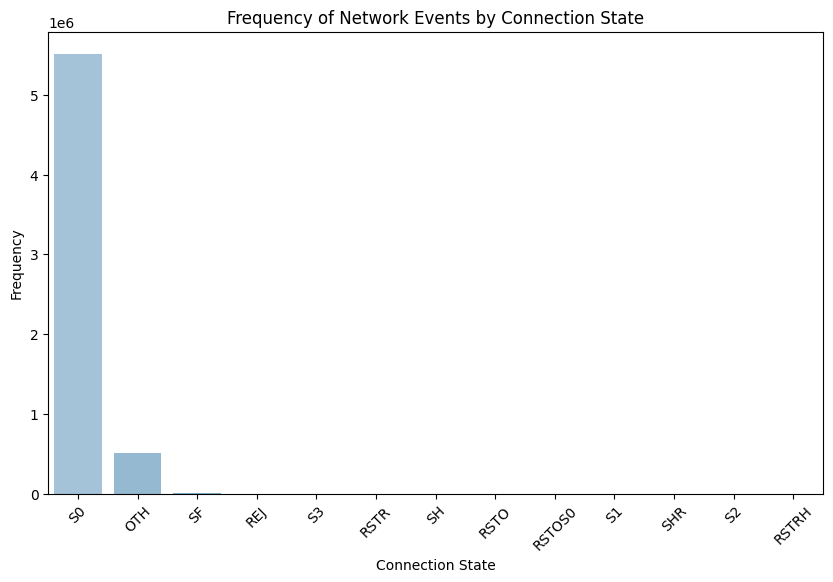

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=connection_states_freq.index, y=connection_states_freq.values, palette='Blues_d')

plt.xlabel('Connection State')
plt.ylabel('Frequency')
plt.title('Frequency of Network Events by Connection State')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()


In [26]:
connection_states_freq

S0        5514038
OTH        515339
SF          11653
REJ          2488
S3           2484
RSTR          334
SH            105
RSTO          100
RSTOS0         44
S1             16
SHR            14
S2              6
RSTRH           2
Name: connection_state, dtype: int64